# Anomaly Detection using VQVAE

## Student : Hussin Almoustafa 

This notebook implements anomaly detection using a Vector Quantized Variational Autoencoder (VQVAE) on X-ray images. The implementation uses TensorFlow and the Keras API.

The implementation consists of the following main steps:

1. Preparing the data: The notebook loads two datasets of X-ray images (normal and unhealthy) and prepares them for training and validation.



2. Defining the VQVAE model: The VQVAE model is defined using TensorFlow and the Keras API.



3. Training the VQVAE model: The VQVAE model is trained on the normal X-ray dataset.



4. Evaluating the VQVAE model: The trained VQVAE model is evaluated on the validation set and the performance metrics (Mean Squared Error and Peak Signal to Noise Ratio) are printed.



5. Anomaly detection: An AnomalyDetector class is defined that uses the trained VQVAE model to detect anomalies in the unhealthy X-ray dataset.



6. Visualizing the anomaly detection results: The results of the anomaly detection on a specific X-ray image are visualized using a heatmap.

# Import required libraries


In [19]:
from VQVAE import ResidualBlock, VectorQuantizer, VQVAE
from Anomaly_detaction import AnomalyDetector
from Dataset import UnhealthyXRayDataset, NormalDataset
import tensorflow as tf
import tensorflow_datasets as tfds
from sklearn.model_selection import train_test_split
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.models import save_model

# Define hyperparameters
Next, we define the hyperparameters for our VQ-VAE model, including the batch size, number of epochs, learning rate, number of embeddings, embedding dimensions, and commitment cost.



In [22]:
# Define hyperparameters
batch_size = 4
num_epochs = 25
learning_rate = 0.001
num_embeddings = 64
embedding_dim = 64
commitment_cost = 0.25



# Define the paths to the normal and unhealthy X-ray image directories

We will be using the Chest X-Ray Images dataset from Kaggle, which contains images of chest X-rays for patients with and without pneumonia. First, we define the paths for the normal and unhealthy image directories.

In [23]:
normal_image_path = "C:/Users/hasso/Desktop/Hu/jaar 3/INNO/Image-Processing-and-Computer-Vision/Anomaly detaction/chest_xray/chest_xray/train/NORMAL/"  # List of normal image paths

unhealthy_image_path = "C:/Users/hasso/Desktop/Hu/jaar 3/INNO/Image-Processing-and-Computer-Vision/Anomaly detaction/chest_xray/chest_xray/train/PNEUMONIA/"


# Create instances of the NormalDataset and UnhealthyXRayDataset

We then create instances of the NormalDataset and UnhealthyXRayDataset classes, which are custom datasets that we defined in the Dataset.py file.

In [24]:
# Create instances of the NormalDataset and UnhealthyXRayDataset
normal_dataset_instance = NormalDataset(normal_image_path)
unhealthy_dataset_instance = UnhealthyXRayDataset(unhealthy_image_path)

# Create tf.data.Dataset objects for both datasets
normal_dataset = tf.data.Dataset.from_generator(normal_dataset_instance.generator,
                                                output_types=(tf.float32, tf.int32),
                                                output_shapes=(
                                                    tf.TensorShape([None, None, 1]),
                                                    tf.TensorShape([]),
                                                ))

unhealthy_dataset = tf.data.Dataset.from_generator(unhealthy_dataset_instance.generator,
                                                   output_types=(tf.float32, tf.int32),
                                                   output_shapes=(
                                                       tf.TensorShape([None, None, 1]),
                                                       tf.TensorShape([]),
                                                   ))

# Split the normal dataset into train and validation sets
train_size = int(0.8 * len(normal_dataset_instance))
val_size = len(normal_dataset_instance) - train_size

train_normal_dataset = normal_dataset.take(train_size)
val_normal_dataset = normal_dataset.skip(train_size)

# Create dataloaders for the normal and unhealthy datasets
train_normal_dataloader = train_normal_dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
val_normal_dataloader = val_normal_dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)

unhealthy_dataloader = unhealthy_dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)


# Train the VQ-VAE Model
 we create an instance of the VQ-VAE model with the specified hyperparameters. The VQ-VAE model is implemented in the VQVAE.py file, which we import at the beginning of the notebook. We create an instance of the VQVAE class and pass in the required hyperparameters, such as the input image channel, number of embeddings, embedding dimension, and commitment cost.
 
 We also set the batch size, number of epochs, and learning rate as hyperparameters for training the model later. The in_channels parameter is set to 1 since our input images are grayscale. The num_embeddings and embedding_dim parameters control the number and size of the codebook vectors, respectively. Finally, the commitment_cost parameter controls the trade-off between reconstruction accuracy and codebook usage.



Epoch [1/25], Loss: 0.030400


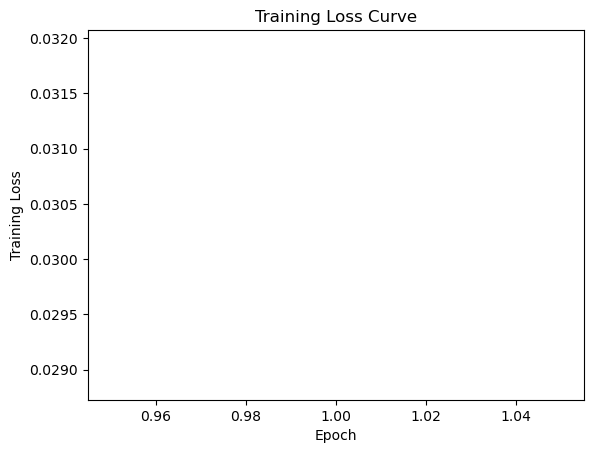

Epoch [2/25], Loss: 0.023186


<Figure size 640x480 with 0 Axes>

Epoch [3/25], Loss: 0.022364


<Figure size 640x480 with 0 Axes>

Epoch [4/25], Loss: 0.022237


<Figure size 640x480 with 0 Axes>

Epoch [5/25], Loss: 0.022149


<Figure size 640x480 with 0 Axes>

Epoch [6/25], Loss: 0.022050


<Figure size 640x480 with 0 Axes>

Epoch [7/25], Loss: 0.022023


<Figure size 640x480 with 0 Axes>

Epoch [8/25], Loss: 0.021996


<Figure size 640x480 with 0 Axes>

Epoch [9/25], Loss: 0.021979


<Figure size 640x480 with 0 Axes>

Epoch [10/25], Loss: 0.022218


<Figure size 640x480 with 0 Axes>

Epoch [11/25], Loss: 0.022013


<Figure size 640x480 with 0 Axes>

Epoch [12/25], Loss: 0.021957


<Figure size 640x480 with 0 Axes>

Epoch [13/25], Loss: 0.021995


<Figure size 640x480 with 0 Axes>

Epoch [14/25], Loss: 0.021921


<Figure size 640x480 with 0 Axes>

Epoch [15/25], Loss: 0.021919


<Figure size 640x480 with 0 Axes>

Epoch [16/25], Loss: 0.026291


<Figure size 640x480 with 0 Axes>

Epoch [17/25], Loss: 0.022327


<Figure size 640x480 with 0 Axes>

Epoch [18/25], Loss: 0.022097


<Figure size 640x480 with 0 Axes>

Epoch [19/25], Loss: 0.022030


<Figure size 640x480 with 0 Axes>

Epoch [20/25], Loss: 0.021993


<Figure size 640x480 with 0 Axes>

Epoch [21/25], Loss: 0.021972


<Figure size 640x480 with 0 Axes>

Epoch [22/25], Loss: 0.021978


<Figure size 640x480 with 0 Axes>

Epoch [23/25], Loss: 0.021943


<Figure size 640x480 with 0 Axes>

Epoch [24/25], Loss: 0.021960


<Figure size 640x480 with 0 Axes>

Epoch [25/25], Loss: 0.021937


<Figure size 640x480 with 0 Axes>

[0.030399939618003902,
 0.023186085617809153,
 0.02236417437444872,
 0.022236790207784567,
 0.022148842281147614,
 0.022050247308033614,
 0.022022971332962833,
 0.021995551761851383,
 0.021979392759168326,
 0.022217804415902095,
 0.022013218317236474,
 0.02195693147160224,
 0.021994892947042165,
 0.021920600071994225,
 0.021918813689653552,
 0.026290533958531138,
 0.022326564688735933,
 0.022097247182878095,
 0.022029617417659332,
 0.02199255438215697,
 0.021972295680820052,
 0.021977658197283746,
 0.021943347967827497,
 0.02196044183489102,
 0.021936739063752233]

In [25]:
#reate an instance of the VQVAE model
vqvae = VQVAE(in_channels=1, num_embeddings=num_embeddings, embedding_dim=embedding_dim, commitment_cost=commitment_cost)

dataset_size = len(normal_dataset_instance)
# Train the model on the training dataset
vqvae.train_vqvae(train_normal_dataloader, num_epochs=num_epochs, learning_rate=learning_rate, dataset_size=dataset_size, batch_size=batch_size)


#  Evaluate the performance of the trained VQ-VAE model.

First, we calculate the validation loss on the validation dataset using the trained model. We iterate through the validation dataloader and compute the reconstruction loss and the VQ loss. We add these losses to obtain the total loss for each batch and then average the total loss across all batches to obtain the validation loss for the entire validation set.

In [26]:
total_loss = 0
num_val_batches = 0

for x, _ in val_normal_dataloader:
    x_recon, z_e, z_q, indices, vq_loss = vqvae(x, training=False)
    recon_loss = tf.reduce_mean(tf.keras.losses.MSE(x_recon, x))
    loss = recon_loss + vq_loss
    total_loss += loss.numpy()
    num_val_batches += 1

avg_loss = total_loss / num_val_batches
print(f'Validation loss: {avg_loss:.6f}')


Validation loss: 0.027634


# Save the model

In [29]:
# Save the trained model to a file
vqvae.save_model("model")

# Evaluate the model on the test dataset 

Next, we evaluate the model on the test dataset. We iterate through the validation dataloader and calculate the mean squared error (MSE) and the peak signal-to-noise ratio (PSNR) for the reconstructed images and the original images.

Mean Squared Error: 0.0275
PSNR: 15.8394


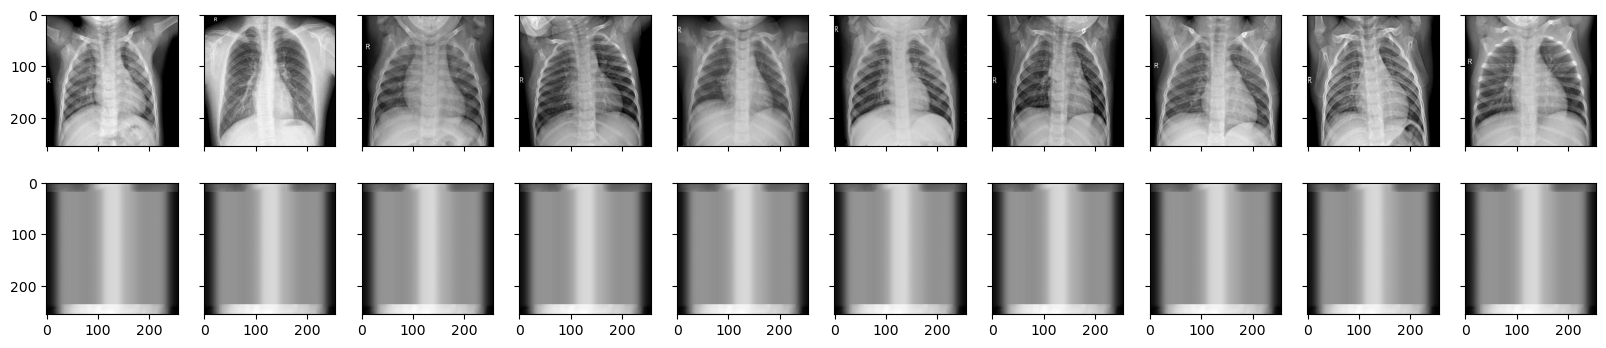

In [32]:
# Evaluate model on test dataset
mse = tf.keras.metrics.MeanSquaredError()
psnr_values = []

for x_test, _ in val_normal_dataloader:
    x_test = tf.cast(x_test, tf.float32)
    x_recon, _, _, _, _ = vqvae(x_test)
    mse.update_state(x_test, x_recon)
    psnr_value = tf.image.psnr(x_test, x_recon, max_val=1.0)
    psnr_values.append(psnr_value)

# Print MSE and PSNR scores
psnr_values = tf.concat(psnr_values, axis=0)  # Concatenate PSNR values before taking mean
print(f"Mean Squared Error: {mse.result().numpy():.4f}")
print(f"PSNR: {tf.reduce_mean(psnr_values).numpy():.4f}")

# Plot reconstructed images and original images side by side
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20, 4))

for i, (x_test, _) in enumerate(val_normal_dataloader):
    if i >= 10:
        break

    x_test = tf.cast(x_test, tf.float32)
    x_recon, _, _, _, _ = vqvae(x_test)
    x_test = np.squeeze(x_test.numpy())
    x_recon = np.squeeze(x_recon.numpy())

    axes[0][i].imshow(x_test[0], cmap='gray')
    axes[1][i].imshow(x_recon[0], cmap='gray')

plt.show()


# Apply anomaly detection on the unhealthy dataset

Finally, we apply anomaly detection on the unhealthy dataset using the trained model and the anomaly detector. We detect anomalies in the dataset and visualize the anomaly detection results for a specific sample.

Note: The anomaly detection part assumes that we have already instantiated and trained an AnomalyDetector object.

In [ ]:
# Create an instance of the AnomalyDetector class
anomaly_detector = AnomalyDetector(vqvae, threshold=0.1 )  
# Apply anomaly detection on the unhealthy dataset
anomalies = anomaly_detector.detect_anomalies(unhealthy_dataloader)
print(f"Anomalies detected: {len(anomalies)}")

# Visualize the anomaly detection results for a specific sample
sample_index = 0  # Choose the index of the sample you want to visualize
sample_x = unhealthy_dataset[sample_index]

x_recon, _, _, _, _ = vqvae(sample_x[np.newaxis, ...])
anomaly_detector.visualize_heatmap(sample_x, x_recon[0])


Anomalie detectie is een techniek die wordt gebruikt om zeldzame gebeurtenissen of items te identificeren die aanzienlijk afwijken van het grootste deel van de data. Deze afwijkende items worden anomalieën of uitbijters genoemd en kunnen duiden op kritieke incidenten, zoals fraude, storingen, defecten of andere ongewenste gebeurtenissen. In de context van beeldverwerking kan anomalie detectie helpen bij het identificeren van ongebruikelijke of onverwachte patronen in afbeeldingen die mogelijk verband houden met defecten, beschadigingen of andere ongewenste kenmerken.

VQ-VAE (Vector Quantized Variational Autoencoder) is een generatief model dat leert om complexe gegevens, zoals afbeeldingen, te comprimeren en te reconstrueren. In tegenstelling tot traditionele autoencoders, gebruikt VQ-VAE een discrete latente ruimte door middel van vector kwantisatie, wat resulteert in een betere compressie en een efficiëntere generatie van nieuwe gegevens. Het VQ-VAE model bestaat uit een encoder, die de invoerdata comprimeert in een latente ruimte, en een decoder, die de latente representatie terug omzet naar de oorspronkelijke vorm van de gegevens. Tijdens het trainingsproces optimaliseert het model de volgende objectieve functie:

\begin{equation}
L(x) = \mathbb{E}_{q(z|x)}[-\log p(x|z)] + \beta KL(q(z|x)||p(z))
\end{equation}

Waarbij $L(x)$ de verliesfunctie is, $x$ de invoerdata, $z$ de latente variabele, $p(x|z)$ de decoder, $q(z|x)$ de encoder, en $p(z)$ de prior distributie van de latente variabelen. De term $\beta$ is een hyperparameter die de afweging tussen de reconstructie- en regularisatieterm regelt.

Anomalie detectie met VQ-VAE maakt gebruik van de reconstructie-afwijking tussen de oorspronkelijke afbeelding en de gereconstrueerde afbeelding om anomalieën te identificeren. Een hoge reconstructie-afwijking duidt op een afbeelding die sterk afwijkt van wat het model heeft geleerd, wat suggereert dat het een anomalie kan zijn.

Het is belangrijk op te merken dat het trainen van VQ-VAE modellen veel rekenkracht en data vereist. Om effectief te zijn in het leren van de onderliggende structuren en patronen in de gegevens, heeft het model toegang nodig tot een grote hoeveelheid voorbeelden. Bovendien vereist de training van het model geavanceerde hardware, zoals grafische verwerkingseenheden (GPU's), om de benodigde berekeningen efficiënt uit te voeren. Dit kan de kosten en de tijd die nodig is om een effectief anomalie detectie systeem te ontwikkelen aanzienlijk verhogen.

# Conclusie 

Anomalie detectie met VQ-VAE is een veelbelovende techniek voor het identificeren van ongebruikelijke of onverwachte patronen in afbeeldingen. De kracht van VQ-VAE ligt in het vermogen om complexe gegevens efficiënt te comprimeren en te reconstrueren, waardoor het model in staat is om subtiele verschillen tussen normale en afwijkende patronen vast te leggen.

Echter, het trainen van een VQ-VAE model voor anomalie detectie is een rekenkundig intensief proces dat veel data en geavanceerde hardware vereist. Dit kan leiden tot hoge kosten en langere ontwikkeltijden, wat een belemmering kan vormen voor sommige toepassingen.

Ondanks deze uitdagingen biedt VQ-VAE een effectieve benadering voor anomalie detectie in beeldverwerking en computer vision. Door voortdurend onderzoek en verbeteringen in de algoritmen en hardware, is het waarschijnlijk dat deze techniek verder zal worden geoptimaliseerd en toegepast in een breed scala van industrieën en toepassingen, variërend van productinspectie tot medische beeldanalyse en beveiliging.